<a href="https://colab.research.google.com/github/ferdouszislam/pytorch-practice/blob/main/pytorch_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np
import math

In [ ]:
if torch.cuda.is_available():
  print('GPU, yay!')
else:
  print('CPU :(')

CPU :(


# Tutorial 02 - Tensor Basics

In [ ]:
x = torch.rand(3,3)
y = torch.rand(3,3)

In [ ]:
print(x, '\n', y, '\n')

tensor([[0.1462, 0.2233, 0.9211],
        [0.3635, 0.7351, 0.5387],
        [0.9280, 0.8394, 0.4823]]) 
 tensor([[0.6323, 0.6516, 0.4581],
        [0.8582, 0.2674, 0.8887],
        [0.0805, 0.9711, 0.9377]]) 



In [ ]:
z = torch.add(x, y)
z

tensor([[0.7785, 0.8749, 1.3793],
        [1.2217, 1.0025, 1.4274],
        [1.0085, 1.8105, 1.4200]])

In [ ]:
z = torch.mul(x, y)
z 

tensor([[0.0924, 0.1455, 0.4220],
        [0.3120, 0.1966, 0.4787],
        [0.0747, 0.8152, 0.4523]])

In [ ]:
z.add_(y) # same as z+=y

tensor([[0.7248, 0.7971, 0.8801],
        [1.1702, 0.4640, 1.3674],
        [0.1553, 1.7863, 1.3900]])

In [ ]:
z[:, 2] # get all rows at column 2 (0 based indexing)

tensor([0.8801, 1.3674, 1.3900])

In [ ]:
z[1,2].item() # get single element value

1.3674143552780151

In [ ]:
'''
input- a pytorch tensor variable 
returns- multiplication of the input tensor's dimensions 
'''
def get_flat_shape(tensor):
  dims=list(tensor.size())
  flat_dim = 1
  for dim in dims:
    flat_dim*=dim
  return flat_dim

In [ ]:
get_flat_shape(z)

9

In [ ]:
flat_z = z.view(get_flat_shape(z)) # resizing a tensor
flat_z

tensor([0.7248, 0.7971, 0.8801, 1.1702, 0.4640, 1.3674, 0.1553, 1.7863, 1.3900])

In [ ]:
# tensor to numpy array conversion
np_z = flat_z.clone().numpy() # using '.clone()' is a MUST
np_z

array([0.72476834, 0.79708713, 0.88014144, 1.1702007 , 0.46396384,
       1.3674144 , 0.15526175, 1.7862701 , 1.389991  ], dtype=float32)

In [ ]:
# numpy array to tensor conversion
flat_z = torch.from_numpy(np_z.copy()) # using '.copy()' is a MUST
flat_z

tensor([0.7248, 0.7971, 0.8801, 1.1702, 0.4640, 1.3674, 0.1553, 1.7863, 1.3900])

  
  **Tensors can be kept into GPU but numpy arrays have to remain on CPU. GPUs are generally faster.**  


In [ ]:
device = False
if torch.cuda.is_available():
  device = torch.device("cuda")

In [ ]:
# all operations on tensors to be done in GPU
# x = torch.rand(2, 2).to(device)
# y = torch.rand(2, 2).to(device)
# z=x+y

# print(x, '\n', y, '\n', z)

In [ ]:
# numpy arrays MUST be on cpu
z = z.to('cpu')
np_z = z.clone().numpy()
np_z

array([[0.72476834, 0.79708713, 0.88014144],
       [1.1702007 , 0.46396384, 1.3674144 ],
       [0.15526175, 1.7862701 , 1.389991  ]], dtype=float32)

# Tutorial 03 - Gradient Calculation with Autograd

In [ ]:
x = torch.randn(3, requires_grad=True)
x

tensor([ 2.4671, -1.5343,  1.2387], requires_grad=True)

In [ ]:
y=x+2
print(y)
z=y*y*2
print(z)
z = z.mean()
print(z) 

tensor([4.4671, 0.4657, 3.2387], grad_fn=<AddBackward0>)
tensor([39.9097,  0.4338, 20.9777], grad_fn=<MulBackward0>)
tensor(20.4404, grad_fn=<MeanBackward0>)


In [ ]:
# calculating dz/dx for each element of x tensor (in this case- x1,x2,x3)
#  N.B- All but the last call to backward should have the retain_graph=True option
z.backward(retain_graph=True)
print(x.grad)

tensor([5.9561, 0.6209, 4.3182])


In [ ]:
# prevent gradient tracking 
# (might be needed when updating weights during training)

x = torch.randn(3, requires_grad=True)
print(x)

# way 1
print('way 1')
y=x
y.requires_grad_(False)
print(x)

# way 2
print('way 2')
y=x.detach()
print(y)

# way 3
print('way 3')
y=x+2
print(x, '\n', y)
with torch.no_grad():
  y=x+2
  print(x, '\n', y)

tensor([ 0.3228,  0.5156, -0.9595], requires_grad=True)
way 1
tensor([ 0.3228,  0.5156, -0.9595])
way 2
tensor([ 0.3228,  0.5156, -0.9595])
way 3
tensor([ 0.3228,  0.5156, -0.9595]) 
 tensor([2.3228, 2.5156, 1.0405])
tensor([ 0.3228,  0.5156, -0.9595]) 
 tensor([2.3228, 2.5156, 1.0405])


In [ ]:
# dummy training example with some weights

weights = torch.ones(4, requires_grad=True)

for epoch in range(3):
  model_output = (weights*3).sum() # loss function... probably
  
  model_output.backward()
  print(weights.grad)

  # before next iteration or optimization step MUST empty the gradient
  weights.grad.zero_()

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


# Tutorial 04 - Back Propagation

In [ ]:
# example backpropagation for a single instance

x = torch.tensor(1.0) # input
y = torch.tensor(2.0) # actual output

w = torch.tensor(1.0, requires_grad=True) # weight i.e, learnable parameter

# forward pass
y_hat = w*x # y_hat is the prediction using linear model = w*x 
loss = (y_hat - y)**2 # loss function = squared error (generally this would be MSE)

print(loss)

# backward pass
loss.backward()
print(w.grad)

# now update weight using the gradient 
# and do forward and backward pass again

tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


# Tutorial 05 - Gradient Descent with Autograd & Backpropagation



In [ ]:
# implementing linear regression from scratch with dummy data

# f = w*x, for the example model below- w = 2 fits the ouput completely 
X = np.array([1,2,3,4], dtype=np.float32) # input
Y = np.array([2,4,6,8], dtype=np.float32) # actual output

# randomely initializing weight
w = 0.0

# model prediction
def forward(x):
  return w*x

# loss function, MSE
def loss(y, y_pred):
  return ((y_pred-y)**2).mean()

# gradient
# here, loss, J = 1/N * (w*x-y)^2 [because y_pred = w*x]
# therefore, dJ/dw = 1/N*2*x*(w*x-y)
def gradient(x, y, y_pred):
  return np.dot(2*x, y_pred-y).mean()

print(f'Prediction before training for x=5 : {forward(5):.3f}')

# Training
learning_rate = 0.01
n_iters = 5

print('\n[Training started...]\n')
for epoch in range(n_iters):
  # prediction, forward pass
  y_pred = forward(X)

  # loss
  J = loss(Y, y_pred)

  # gradient
  dJ_dw = gradient(X, Y, y_pred)

  # update weights
  w = w - learning_rate* dJ_dw 

  # print everytime
  if epoch%1==0:
    print(f'epoch {epoch+1}: w = {w:.3f}, loss = {J:.8f}')
print('\n[Training finished...]\n')

print(f'Prediction after training for x=5 : {forward(5):.3f}')

Prediction before training for x=5 : 0.000

[Training started...]

epoch 1: w = 1.200, loss = 30.00000000
epoch 2: w = 1.680, loss = 4.79999924
epoch 3: w = 1.872, loss = 0.76800019
epoch 4: w = 1.949, loss = 0.12288000
epoch 5: w = 1.980, loss = 0.01966083

[Training finished...]

Prediction after training for x=5 : 9.898


### Now let's do the same using Autograd for backward pass

In [ ]:
# implementing linear regression from scratch with dummy data

# f = w*x, for the example model below- w = 2 fits the ouput completely 
X = torch.tensor([1,2,3,4], dtype=torch.float32) # input
Y = torch.tensor([2,4,6,8], dtype=torch.float32) # actual output

# randomely initializing weight
w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# model prediction
def forward(x):
  return w*x

# loss function, MSE
def loss(y, y_pred):
  return ((y_pred-y)**2).mean()

# gradient
# here, loss, J = 1/N * (w*x-y)^2 [because y_pred = w*x]
# therefore, dJ/dw = 1/N*2*x*(w*x-y)
# def gradient(x, y, y_pred):
#   return np.dot(2*x, y_pred-y).mean()

print(f'Prediction before training for x=5 : {forward(5):.3f}')

# Training
learning_rate = 0.01
n_iters = 20

print('\n[Training started...]\n')
for epoch in range(n_iters):
  # prediction i.e forward pass
  y_pred = forward(X)

  # loss
  J = loss(Y, y_pred)

  # calculate gradient i.e backward pass
  #dJ_dw = gradient(X, Y, y_pred)
  J.backward() # dJ/dw

  # update weights
  #w = w - learning_rate* dJ_dw 
  w.data = w.data - learning_rate * w.grad
  # alternately we can do this,
  # with torch.no_grad(): 
  #   # update to weight should not be tracked for calculating gradient
  #   w -= learning_rate*w.grad

  w.grad.zero_() # clear the gradients 

  if epoch%2==1:
    print(f'epoch {epoch+1}: w = {w:.3f}, loss = {J:.8f}')
print('\n[Training finished...]\n')

print(f'Prediction after training for x=5 : {forward(5):.3f}')

Prediction before training for x=5 : 0.000

[Training started...]

epoch 2: w = 0.555, loss = 21.67499924
epoch 4: w = 0.956, loss = 11.31448650
epoch 6: w = 1.246, loss = 5.90623236
epoch 8: w = 1.455, loss = 3.08308983
epoch 10: w = 1.606, loss = 1.60939169
epoch 12: w = 1.716, loss = 0.84011245
epoch 14: w = 1.794, loss = 0.43854395
epoch 16: w = 1.851, loss = 0.22892261
epoch 18: w = 1.893, loss = 0.11949898
epoch 20: w = 1.922, loss = 0.06237914

[Training finished...]

Prediction after training for x=5 : 9.612


# Tutorial 06 - Training Pipeline: Model, Loss, and Optimizer

### Implementing Linear Regression same as before but this time with model, loss, optimizer, autograd from the **torch.nn** library

In [ ]:
import torch.nn as nn

In [ ]:
'''
Typical Training Pipeline

1. design model (input size, output size, forward pass)
2. Construct loss & optimizer
3. Training loop
  - forward pass: compute prediction
  - backward pass: compute gradients
  - update weights
'''
# implementing linear regression from scratch with dummy data

# f = w*x, for the example model below- w = 2 fits the ouput completely 
X = torch.tensor([[1],[2],[3],[4]], dtype=torch.float32) # input
Y = torch.tensor([[2],[4],[6],[8]], dtype=torch.float32) # actual output

n_samples, n_features = X.shape # 4 samples each with one feature
print('# of samples =', n_samples, ' # of features =', n_features, '\n')

# define custom model (same as Linear Regression for now)
class MyLinearRegression(nn.Module):

  def __init__(self, input_dim, output_dim):
    super(MyLinearRegression, self).__init__()
    # define layers
    self.lin = nn.Linear(input_dim, output_dim)

  def forward(self, x):
    return self.lin(x)

# model = nn.Linear(in_features=n_features, out_features=1)
model = MyLinearRegression(input_dim=n_features, output_dim=1)

# test data
X_test = torch.tensor([5], dtype=torch.float32)

print(f'Prediction before training for x=5 : {model(X_test).item():.3f}')

# Training
learning_rate = 0.01
n_iters = 20 
# MSE as loss function
loss = nn.MSELoss()
# optimize model with stochastic gradient descent
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

print('\n[Training started...]\n')
for epoch in range(n_iters):
  # prediction i.e forward pass
  y_pred = model(X)

  # loss
  J = loss(y_pred, Y)

  # calculate gradient i.e backward pass
  J.backward() # dJ/dw

  # update weights using optimizer
  optimizer.step()
  optimizer.zero_grad() # clear the gradients 

  if epoch%2==1:
    [w, b] = model.parameters()
    print(f'epoch {epoch+1}: w = {w[0][0].item():.3f}, loss = {J:.3f}')
print('\n[Training finished...]\n')

print(f'Prediction after training for x=5 : {model(X_test).item():.3f}')

# of samples = 4  # of features = 1 

Prediction before training for x=5 : -2.978

[Training started...]

epoch 2: w = -0.007, loss = 33.300
epoch 4: w = 0.476, loss = 16.174
epoch 6: w = 0.812, loss = 7.927
epoch 8: w = 1.045, loss = 3.955
epoch 10: w = 1.208, loss = 2.041
epoch 12: w = 1.322, loss = 1.117
epoch 14: w = 1.402, loss = 0.671
epoch 16: w = 1.458, loss = 0.455
epoch 18: w = 1.498, loss = 0.349
epoch 20: w = 1.526, loss = 0.297

[Training finished...]

Prediction after training for x=5 : 8.832


# Tutorial 07 Linear Regression

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt

epoch-10, loss = 1316.6125
weight - Parameter containing:
tensor([[13.2203]], requires_grad=True)
bias - Parameter containing:
tensor([-0.5404], requires_grad=True)

epoch-20, loss = 828.6804
weight - Parameter containing:
tensor([[22.8059]], requires_grad=True)
bias - Parameter containing:
tensor([-0.5879], requires_grad=True)

epoch-30, loss = 579.3090
weight - Parameter containing:
tensor([[29.6565]], requires_grad=True)
bias - Parameter containing:
tensor([-0.3346], requires_grad=True)

epoch-40, loss = 451.0138
weight - Parameter containing:
tensor([[34.5611]], requires_grad=True)
bias - Parameter containing:
tensor([0.0376], requires_grad=True)

epoch-50, loss = 384.6354
weight - Parameter containing:
tensor([[38.0781]], requires_grad=True)
bias - Parameter containing:
tensor([0.4310], requires_grad=True)

epoch-60, loss = 350.1282
weight - Parameter containing:
tensor([[40.6039]], requires_grad=True)
bias - Parameter containing:
tensor([0.7973], requires_grad=True)

epoch-70, lo

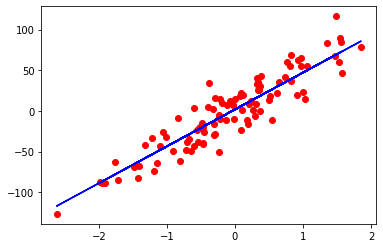

In [ ]:
# step-0 prepare data
X_np, y_np = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=42)
 
X = torch.from_numpy(X_np.astype(np.float32))
y = torch.from_numpy(y_np.astype(np.float32))

y = y.view(y.shape[0], 1) # convert y to row=n_samples and col=1

n_samples, n_features = X.shape

# step-1 model
model = nn.Linear(in_features=n_features, out_features=1)

# step-2 loss & optimizer
learning_rate = 0.02
loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# step-3 training loop
n_iters = 100
for epoch in range(n_iters):
  # forward pass
  y_pred = model(X)

  # loss
  J = loss(y_pred, y)

  # back prop
  J.backward()

  # update weights
  optimizer.step()
  # clear grad
  optimizer.zero_grad()

  if (epoch+1)%10==0:
    print(f'epoch-{epoch+1}, loss = {J.item():.4f}')
    for name, param in model.named_parameters():
      print(name, '-', param)
    print()

# prediction
y_pred = model(X).detach()

# plot
plt.plot(X_np, y_np, 'ro')
plt.plot(X_np, y_pred.numpy(), 'b')
plt.show()

# Tutorial 08 Logistic Regression

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
# step-0 prepare data
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

n_samples, n_features = X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

# convert single row with multiple columns to multiple rows single colums
y_train = y_train.view(y_train.shape[0], 1)

# step-1 model setup

# logistic regression, f = w*x+b and apply sigmoid at the end
class MyLogisticRegression(nn.Module):

  def __init__(self, n_input_features):
    super(MyLogisticRegression, self).__init__()
    self.linear = nn.Linear(in_features=n_input_features, out_features=1)

  def forward(self, x):
    y_pred = torch.sigmoid(self.linear(x))
    return y_pred

model = MyLogisticRegression(n_features)

# step-2 loss & optimizer
learning_rate = 0.01
loss = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# step-3 training loop
n_iters = 100
for epoch in range(n_iters):
  # forward pass
  y_pred = model(X_train)

  # loss 
  J = loss(y_pred, y_train)

  # backward pass
  J.backward()

  # weight updates
  optimizer.step()
  # clear grads
  optimizer.zero_grad()

  if (epoch+1)%10==0:
    print(f'epoch {epoch+1}: loss = {J.item():.4f}')
    # for name, param in model.named_parameters():
    #   print(name, '-', param)

with torch.no_grad():
  y_pred = model(X_test)
  cls_pred = y_pred.round() # if y_pred>=0.5 class = 1, else class = 0
  test_acc = cls_pred.eq(y_test).sum() / float(y_test.shape[0])
  print(f'\ntest accuracy = {test_acc:.3f}')

epoch 10: loss = 0.4891
epoch 20: loss = 0.4360
epoch 30: loss = 0.3969
epoch 40: loss = 0.3668
epoch 50: loss = 0.3426
epoch 60: loss = 0.3228
epoch 70: loss = 0.3062
epoch 80: loss = 0.2919
epoch 90: loss = 0.2796
epoch 100: loss = 0.2687

test accuracy = 59.702


# Tutorial 9 Dataset and DataLoader - Batch Training

In [ ]:
import torchvision
from torch.utils.data import Dataset, DataLoader

In [ ]:
'''
epoch = one forward and backward pass of ALL training samples
batch_size = number of training samples used in one forward/backward pass
number of iterations = number of passes, each pass (forward+backward) using [batch_size] number of samples
e.g : 100 samples, batch_size=20 -> 100/20=5 iterations for 1 epoch
'''

'\nepoch = one forward and backward pass of ALL training samples\nbatch_size = number of training samples used in one forward/backward pass\nnumber of iterations = number of passes, each pass (forward+backward) using [batch_size] number of samples\ne.g : 100 samples, batch_size=20 -> 100/20=5 iterations for 1 epoch\n'

In [ ]:
# mount gdrive with this code
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
class WineDataset(Dataset):

  def __init__(self):
    # data loading
    wine_ds = np.loadtxt('/content/drive/My Drive/Colab Notebooks/wine.csv', delimiter=',', dtype=np.float32, skiprows=1)
    self.x = torch.from_numpy(wine_ds[:, 1:]) # take all rows akip first column
    self.y = torch.from_numpy(wine_ds[:, [0]]) # take all rows first column
    self.n_samples = wine_ds.shape[0]

  def __getitem__(self, index):
    return self.x[index], self.y[index]

  def __len__(self):
    return self.n_samples
    

In [ ]:
wine_ds = WineDataset()
wine_ds[0]

(tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
         3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
         1.0650e+03]), tensor([1.]))

In [ ]:
dataloader = DataLoader(dataset=wine_ds, batch_size=4, shuffle=True, num_workers=2)
data_iter = iter(dataloader)

data = data_iter.next()
features, labels = data
print(features, labels)

tensor([[1.1460e+01, 3.7400e+00, 1.8200e+00, 1.9500e+01, 1.0700e+02, 3.1800e+00,
         2.5800e+00, 2.4000e-01, 3.5800e+00, 2.9000e+00, 7.5000e-01, 2.8100e+00,
         5.6200e+02],
        [1.1660e+01, 1.8800e+00, 1.9200e+00, 1.6000e+01, 9.7000e+01, 1.6100e+00,
         1.5700e+00, 3.4000e-01, 1.1500e+00, 3.8000e+00, 1.2300e+00, 2.1400e+00,
         4.2800e+02],
        [1.4060e+01, 1.6300e+00, 2.2800e+00, 1.6000e+01, 1.2600e+02, 3.0000e+00,
         3.1700e+00, 2.4000e-01, 2.1000e+00, 5.6500e+00, 1.0900e+00, 3.7100e+00,
         7.8000e+02],
        [1.2850e+01, 1.6000e+00, 2.5200e+00, 1.7800e+01, 9.5000e+01, 2.4800e+00,
         2.3700e+00, 2.6000e-01, 1.4600e+00, 3.9300e+00, 1.0900e+00, 3.6300e+00,
         1.0150e+03]]) tensor([[2.],
        [2.],
        [1.],
        [1.]])


In [ ]:
# iterate over dataset by batched (dummy train loop)
num_epochs = 2
total_sample = len(wine_ds)
num_iterations = math.ceil(total_sample/4)
print('total samples =', total_sample, '\n# of iterations(per epoch) =', num_iterations, '\n')

for epoch in range(num_epochs):
  for step, (inputs, labels) in enumerate(dataloader):
    if (step+1)%5==0:
      print(f'epoch {epoch+1}/{num_epochs}, step {step+1}/{num_iterations}, input_dim - {inputs.shape}')

total samples = 178 
# of iterations(per epoch) = 45 

epoch 1/2, step 5/45, input_dim - torch.Size([4, 13])
epoch 1/2, step 10/45, input_dim - torch.Size([4, 13])
epoch 1/2, step 15/45, input_dim - torch.Size([4, 13])
epoch 1/2, step 20/45, input_dim - torch.Size([4, 13])
epoch 1/2, step 25/45, input_dim - torch.Size([4, 13])
epoch 1/2, step 30/45, input_dim - torch.Size([4, 13])
epoch 1/2, step 35/45, input_dim - torch.Size([4, 13])
epoch 1/2, step 40/45, input_dim - torch.Size([4, 13])
epoch 1/2, step 45/45, input_dim - torch.Size([2, 13])
epoch 2/2, step 5/45, input_dim - torch.Size([4, 13])
epoch 2/2, step 10/45, input_dim - torch.Size([4, 13])
epoch 2/2, step 15/45, input_dim - torch.Size([4, 13])
epoch 2/2, step 20/45, input_dim - torch.Size([4, 13])
epoch 2/2, step 25/45, input_dim - torch.Size([4, 13])
epoch 2/2, step 30/45, input_dim - torch.Size([4, 13])
epoch 2/2, step 35/45, input_dim - torch.Size([4, 13])
epoch 2/2, step 40/45, input_dim - torch.Size([4, 13])
epoch 2/2, s

# Tutorial 10 Dataset Transforms

In [ ]:
'''
Transforms can be applied to PIL images, tensors, ndarrays, or custom data
during creation of the DataSet

complete list of built-in transforms: 
https://pytorch.org/docs/stable/torchvision/transforms.html

On Images
---------
CenterCrop, Grayscale, Pad, RandomAffine
RandomCrop, RandomHorizontalFlip, RandomRotation
Resize, Scale

On Tensors
----------
LinearTransformation, Normalize, RandomErasing

Conversion
----------
ToPILImage: from tensor or ndrarray
ToTensor : from numpy.ndarray or PILImage

Generic
-------
Use Lambda 

Custom
------
Write own class

Compose multiple Transforms
---------------------------
composed = transforms.Compose([Rescale(256),
                               RandomCrop(224)])
'''

In [ ]:
# dataset class with transform

class WineDataset(Dataset):

  def __init__(self, transform=None):
    # data loading
    wine_ds = np.loadtxt('/content/drive/My Drive/Colab Notebooks/wine.csv', delimiter=',', dtype=np.float32, skiprows=1)
    self.x = wine_ds[:, 1:] # take all rows akip first column
    self.y = wine_ds[:, [0]] # take all rows first column
    self.n_samples = wine_ds.shape[0]
    self.transform = transform

  def __getitem__(self, index):
    sample = self.x[index], self.y[index]
    if self.transform:
      sample = self.transform(sample)
    return sample

  def __len__(self):
    return self.n_samples


In [ ]:
# custom transform classes (transform using callable objects)

class MyToTensor:
  def __call__(self, sample):
    inputs, targets = sample
    return torch.from_numpy(inputs), torch.from_numpy(targets)

class MyMulTransform:
  def __init__(self, factor):
    self.factor = factor
  
  def __call__(self, sample):
    inputs, target = sample
    inputs*=self.factor
    return inputs, target

In [ ]:
dataset = WineDataset()
features, labels = dataset[0]
print('without transform:', type(features), type(labels))
print('without transform: features =', features)

dataset = WineDataset(transform=MyToTensor())
features, labels = dataset[0]
print('\nwith MyToTensor() transform:', type(features), type(labels))

dataset = WineDataset(transform=MyMulTransform(2))
features, labels = dataset[0]
print('\nwith MyMulTransform(2) transform: features =', features)

without transform: <class 'numpy.ndarray'> <class 'numpy.ndarray'>
without transform: features = [1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]

with MyToTensor() transform: <class 'torch.Tensor'> <class 'torch.Tensor'>

with MyMulTransform(2) transform: features = [2.846e+01 3.420e+00 4.860e+00 3.120e+01 2.540e+02 5.600e+00 6.120e+00
 5.600e-01 4.580e+00 1.128e+01 2.080e+00 7.840e+00 2.130e+03]


# Tutorial 11 Softmax and Cross Entropy

In [ ]:
# softmax using numpy

def softmax(x):
  return np.exp(x) / np.sum(np.exp(x), axis=0)

x = np.array([2.0, 1.0, 0.1])
sm_x = softmax(x)
print(sm_x)

[0.65900114 0.24243297 0.09856589]


In [ ]:
# softmax using pytorch

x = torch.tensor([2.0, 1.0, 0.1])
sm_x = torch.softmax(x, dim=0)
print(sm_x)

tensor([0.6590, 0.2424, 0.0986])


In [ ]:
# cross entropy using numpy

def cross_entropy(actual, predicted):
  loss = -np.sum(actual * np.log(predicted))
  return loss # / float(predicted.shape[0])

y_actual = np.array([1, 0, 0]) # one hot encoded

y_good_pred = np.array([0.7, 0.2, 0.1])
y_bad_pred = np.array([0.1, 0.3, 0.6])
l1 = cross_entropy(y_actual, y_good_pred)
l2 = cross_entropy(y_actual, y_bad_pred)
print(f'loss for good prediction={l1:.3f}')
print(f'loss for bad prediction={l2:.3f}')

loss for good prediction=0.357
loss for bad prediction=2.303


In [ ]:
# cross entropy using pytorch (with multiple samples)

'''
nn.CrossEntropyLoss() automatically applies, 
  nn.LogSoftmax + nn.NLLLoss(neg log likelihood loss)

- Don't apply softmax in the last layer yourself
- y_actual has class labels, not One Hot Encoded!
- y_pred has raw scores and not prob values after softmax
'''

loss = nn.CrossEntropyLoss()

y_actual = torch.tensor([2, 0, 1]) # 3 samples

# 3 sample each sample can be one of 3 classes
y_pred_good = torch.tensor([ [0.2, 1.0, 2.0],[2.0, 1.0, 0.1],[1.0, 2.0, 0.1] ])
y_pred_bad = torch.tensor([ [0.5, 2.0, 0.3],[0.5, 1.0, 2.3],[7.5, 2.0, 1.3] ]) 

l1 = loss(y_pred_good, y_actual)
l2 = loss(y_pred_bad, y_actual)
print('good pred loss =', l1.item())
print('bad pred loss =', l2.item())

_, class_pred_good = torch.max(y_pred_good, 1)
_, class_pred_bad = torch.max(y_pred_bad, 1)
print('\ngood class prediction =', class_pred_good)
print('bad class prediction =', class_pred_bad)

good pred loss = 0.4204676151275635
bad pred loss = 3.236616373062134

good class prediction = tensor([2, 0, 1])
bad class prediction = tensor([1, 2, 0])


### Implementing Basic Neural Networks

In [ ]:
# custom multi-class neural network with one hidden layer and relu activation
class MultiClassNeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(MultiClassNeuralNet, self).__init__()
    self.linear1 = nn.Linear(in_features=input_size, out_features=hidden_size)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(in_features=hidden_size, out_features=num_classes)

  def forward(self, input):
    # input layer to hidden layer
    output = self.relu(self.linear(input))
    # hidden layer to output layer
    output = self.linear2(output)
    
    # don't do softmax because nn.CrossEntropy does it for us

    return output

model = MultiClassNeuralNet(input_size=28*28, hidden_size=5, num_classes=3)
loss = nn.CrossEntropyLoss() # applies softmax to the output automatically

In [ ]:
# custom binary neural network with one hidden layer and relu activation
class BinaryClassNeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size):
    super(BinaryClassNeuralNet, self).__init__()
    self.linear1 = nn.Linear(in_features=input_size, out_features=hidden_size)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(in_features=hidden_size, out_features=1)

  def forward(self, input):
    # input layer to hidden layer
    output = self.relu(self.linear1(input))
    # hidden layer to output layer
    output = self.linear2(output)
    # probability prediction
    y_pred = torch.sigmoid(output)
    return y_pred

model = BinaryClassNeuralNet(input_size=28*28, hidden_size=5)
loss = nn.BCELoss()